## What is inside the file? 

In [5]:
import pickle
import numpy as np
# Replace with your actual file path
with open('deep_analysis_results.pkl', 'rb') as f:
    data = pickle.load(f)

# See the top-level keys (what's inside)
print(data.keys())

for k in data.keys():
    print(f"{k}: {type(data[k])}")
    if isinstance(data[k], (list, np.ndarray)):
        print(f"  Length/shape: {len(data[k]) if isinstance(data[k], list) else data[k].shape}")
    elif isinstance(data[k], dict):
        print(f"  Keys: {list(data[k].keys())[:3]} ...")

# For example, to see the shape of a matrix:
print(data['sim_phil_vs_phil'].shape)

# To see a list of school names:
print(data['school_names_phil'])

# To see a sample of thematic results:
print(list(data['thematic_results'].keys())[:3])
print(data['thematic_results'][list(data['thematic_results'].keys())[:1][0]])

dict_keys(['school_names_phil', 'school_names_reli', 'sim_phil_vs_phil', 'sim_reli_vs_reli', 'sim_phil_vs_reli', 'Z_phil_ward', 'Z_reli_ward', 'Z_unified_ward', 'thematic_results', 'topics'])
school_names_phil: <class 'list'>
  Length/shape: 13
school_names_reli: <class 'list'>
  Length/shape: 12
sim_phil_vs_phil: <class 'numpy.ndarray'>
  Length/shape: (13, 13)
sim_reli_vs_reli: <class 'numpy.ndarray'>
  Length/shape: (12, 12)
sim_phil_vs_reli: <class 'numpy.ndarray'>
  Length/shape: (13, 12)
Z_phil_ward: <class 'numpy.ndarray'>
  Length/shape: (12, 4)
Z_reli_ward: <class 'numpy.ndarray'>
  Length/shape: (11, 4)
Z_unified_ward: <class 'numpy.ndarray'>
  Length/shape: (24, 4)
thematic_results: <class 'dict'>
  Keys: ['query: What is justice?', 'query: What is virtue?', 'query: What is truth?'] ...
topics: <class 'list'>
  Length/shape: 33
(13, 13)
['analytic', 'aristotle', 'capitalism', 'communism', 'continental', 'empiricism', 'feminism', 'german_idealism', 'nietzsche', 'phenomenology

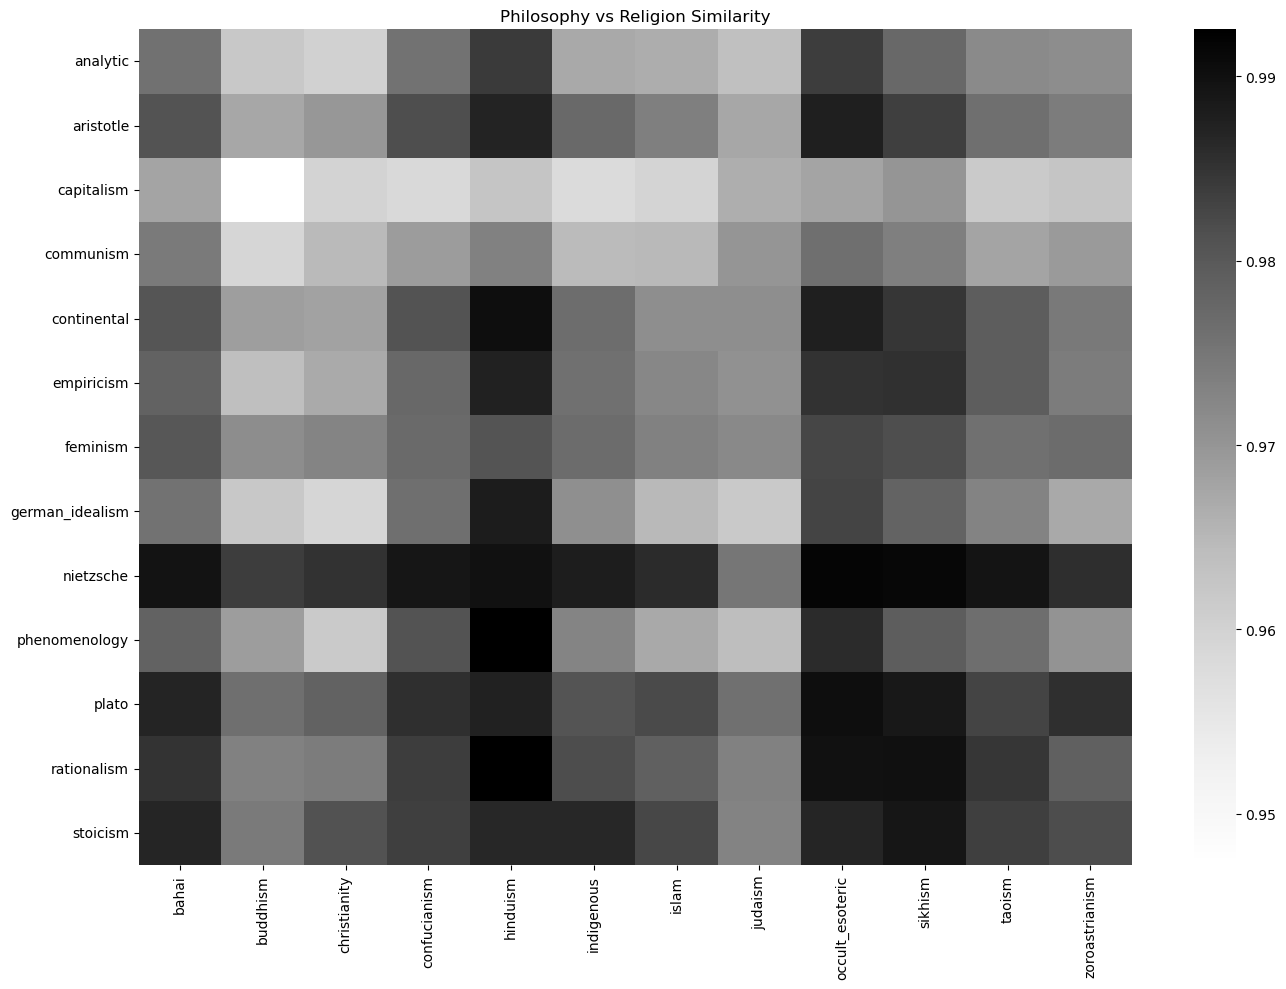

In [6]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
import umap.umap_ as umap  # Make sure umap-learn is installed
from matplotlib.colors import LinearSegmentedColormap

custom_colormap = LinearSegmentedColormap.from_list('custom_cm', ['pink', 'indigo', 'blue', 'cyan', 'lime','green',
                                                                  'orange', 'coral', 'salmon', 'red', 'maroon',
                                                                  'brown', 'grey'])
# Load results
with open('deep_analysis_results.pkl', 'rb') as f:
    results = pickle.load(f)

school_names_phil = results['school_names_phil']
school_names_reli = results['school_names_reli']
sim_phil_vs_phil = results['sim_phil_vs_phil']
sim_reli_vs_reli = results['sim_reli_vs_reli']
sim_phil_vs_reli = results['sim_phil_vs_reli']
Z_phil_ward = results['Z_phil_ward']
Z_reli_ward = results['Z_reli_ward']
Z_unified_ward = results['Z_unified_ward']
thematic_results = results['thematic_results']
topics = results['topics']

# --- 1. Similarity Heatmap ---

plt.figure(figsize=(14, 10))
sns.heatmap(sim_phil_vs_reli, xticklabels=school_names_reli, yticklabels=school_names_phil, cmap='Greys')
plt.title('Philosophy vs Religion Similarity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# --- Linked Dendrogram + Heatmap (Clustermap) for Religion Schools ---
# You can do the same for philosophy or cross-domain
# --- Clustermap with Row Dendrogram and Cluster Colors for Philosophy Schools ---
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster


# --- Number of clusters you want to highlight ---
n_clusters = 4  # Change as needed

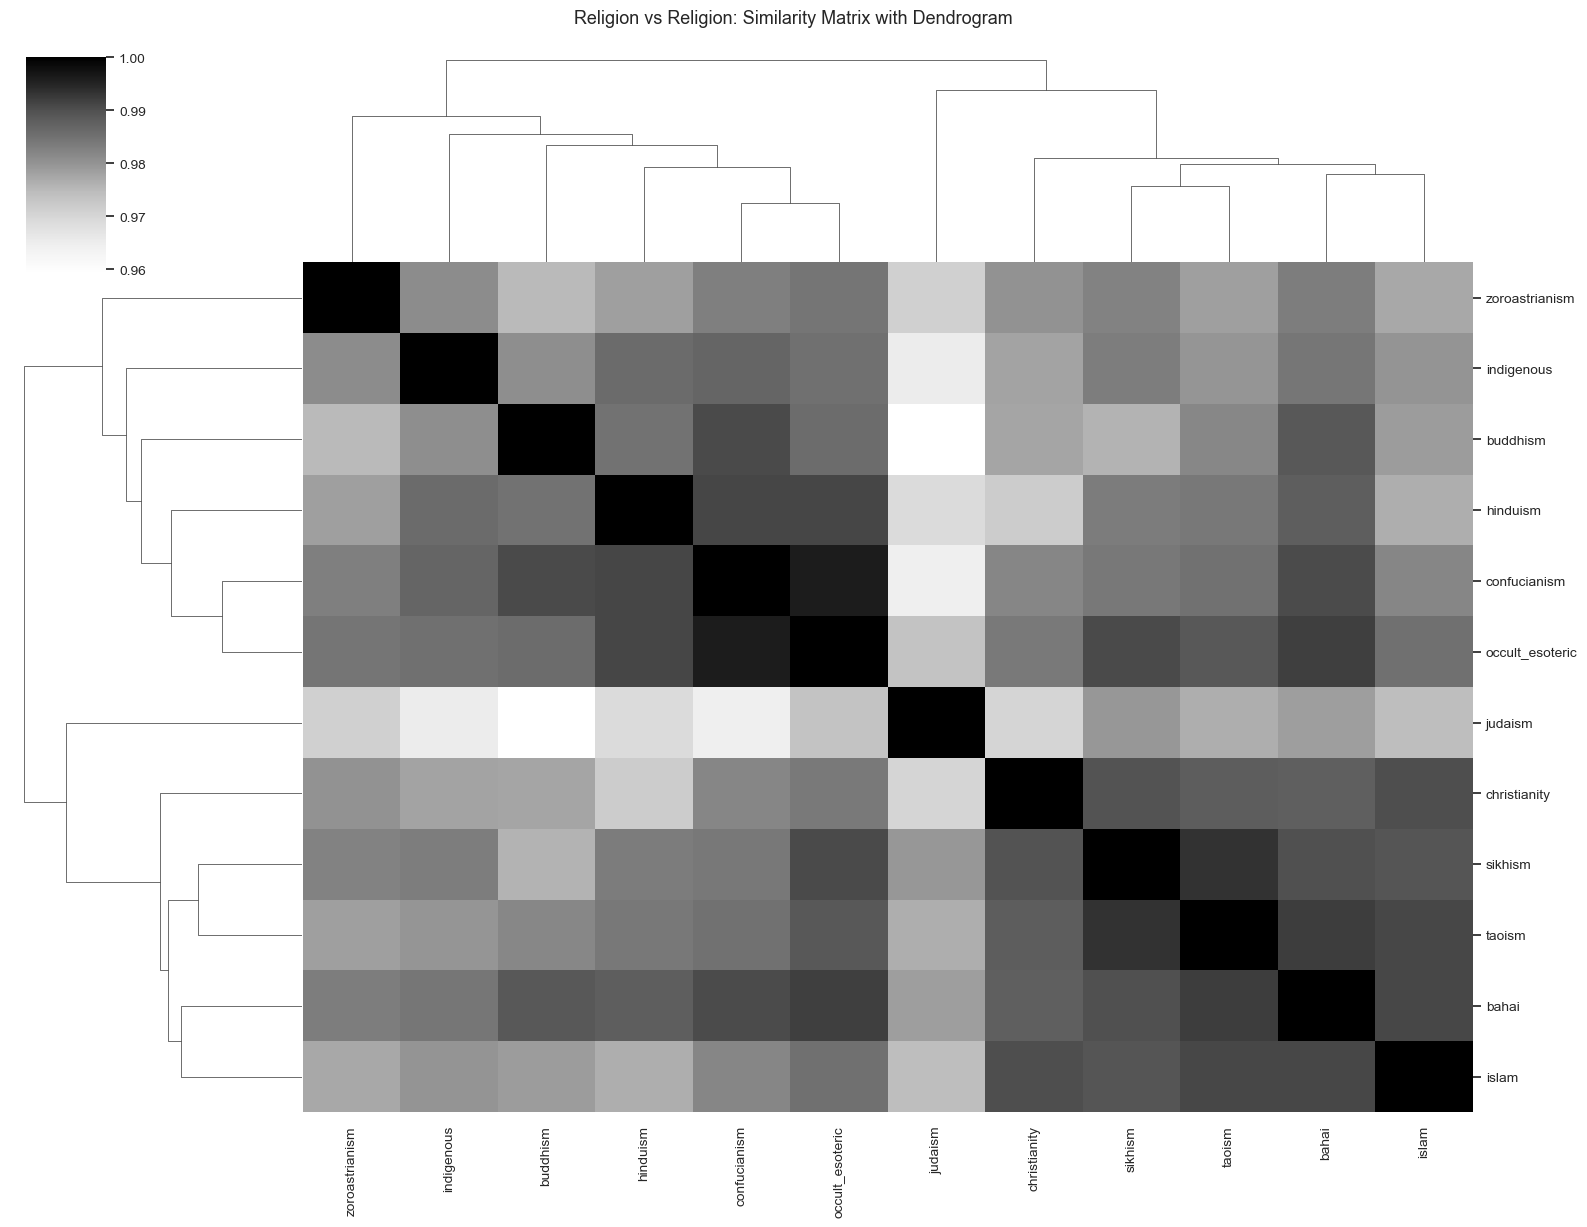

In [7]:
sns.set_theme(font_scale=0.9)
g = sns.clustermap(
    sim_reli_vs_reli,
    row_linkage=Z_reli_ward,
    col_linkage=Z_reli_ward,  # Ensure same order for rows and columns
    xticklabels=school_names_reli,
    yticklabels=school_names_reli,
    cmap='Greys',
    figsize=(16, 12)
)
plt.suptitle("Religion vs Religion: Similarity Matrix with Dendrogram", y=1.02)
plt.show()

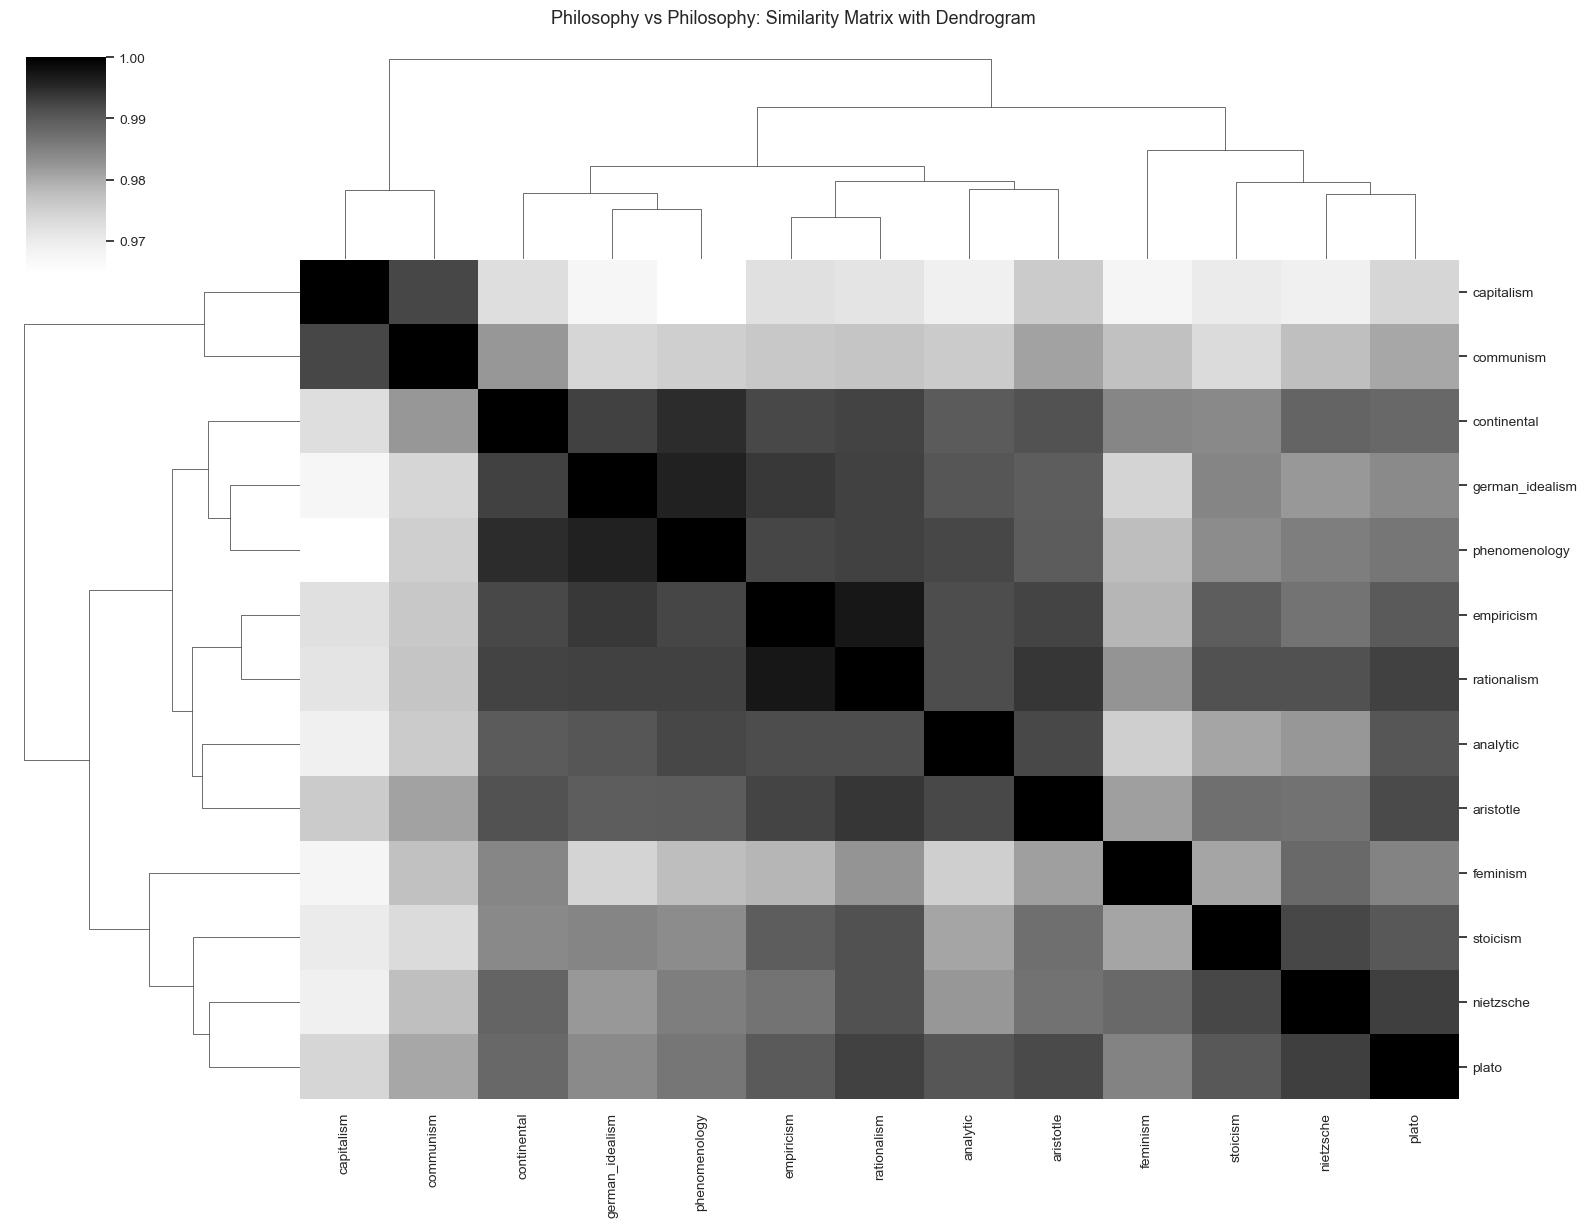

In [8]:
sns.set_theme(font_scale=0.9)
g = sns.clustermap(
    sim_phil_vs_phil,
    row_linkage=Z_phil_ward,
    col_linkage=Z_phil_ward,  # Ensure same order for rows and columns
    xticklabels=school_names_phil,
    yticklabels=school_names_phil,
    cmap='Greys',
    figsize=(16, 12)
)
plt.suptitle("Philosophy vs Philosophy: Similarity Matrix with Dendrogram", y=1.02)
plt.show()

Number of points: 125


/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


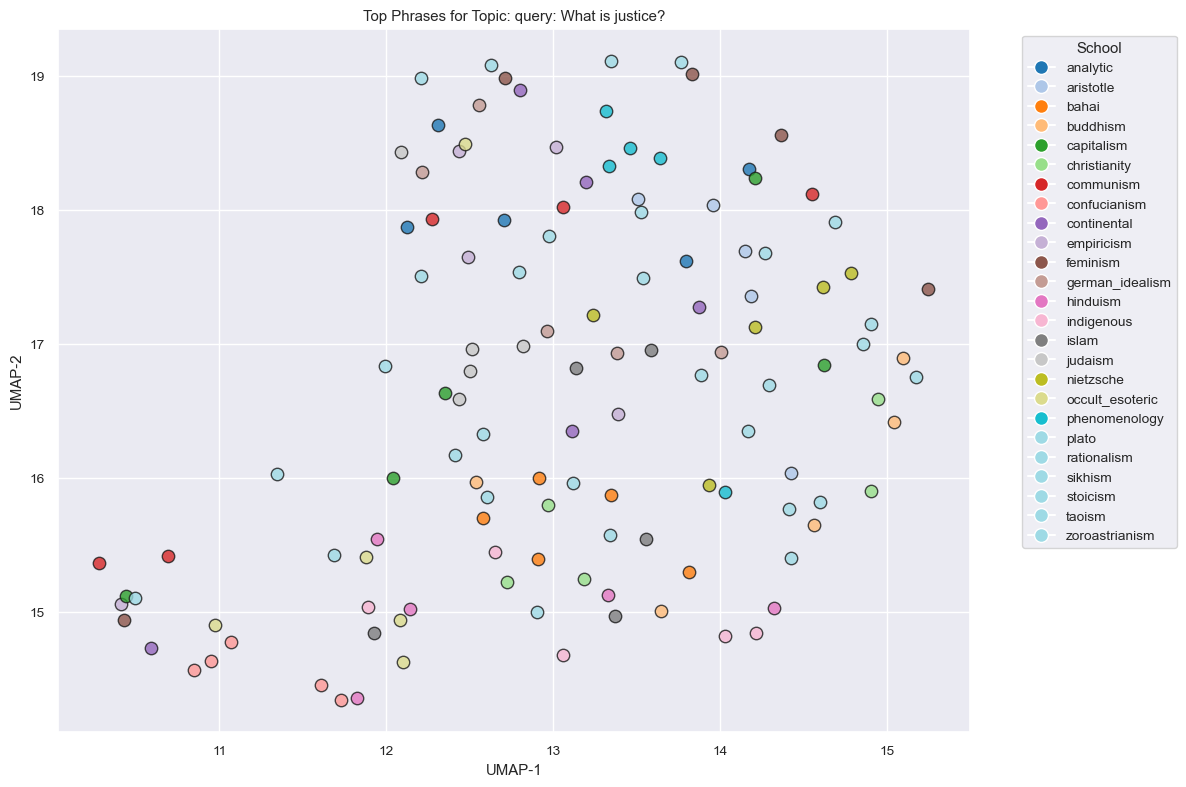

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap

phil_npz = np.load('philosophy_embeddings_merged.npz', allow_pickle=True)
reli_npz = np.load('religion_embeddings_merged.npz', allow_pickle=True)
phil_embeddings = phil_npz['embeddings']
reli_embeddings = reli_npz['embeddings']
phil_meta = phil_npz['metadata']
reli_meta = reli_npz['metadata']

topic = list(thematic_results.keys())[0]

points = []
labels = []
schools = []
domains = []

for domain in ['philosophy', 'religion']:
    if domain == 'philosophy':
        meta = phil_meta
        embeddings = phil_embeddings
        meta_key = 'sentence_str'
    else:
        meta = reli_meta
        embeddings = reli_embeddings
        meta_key = 'text'
    for school, phrases in thematic_results[topic][domain].items():
        for p in phrases:
            # Match phrase text to the correct metadata field
            match = [i for i, m in enumerate(meta) if m[meta_key] == p['text']]
            if match:
                idx = match[0]
                points.append(embeddings[idx])
                labels.append(p['text'][:40] + "..." if len(p['text']) > 40 else p['text'])
                schools.append(school)
                domains.append(domain)

points = np.array(points)
print(f"Number of points: {len(points)}")
if len(points) == 0:
    print("No embeddings found for this topic!")

# Project to 2D
reducer = umap.UMAP(n_components=2, random_state=42)
proj = reducer.fit_transform(points)

unique_schools = list(sorted(set(schools)))
school_to_color = {school: plt.cm.tab20(i) for i, school in enumerate(unique_schools)}

plt.figure(figsize=(12, 8))
for i, (x, y) in enumerate(proj):
    color = school_to_color[schools[i]]
    plt.scatter(x, y, color=color, label=schools[i] if i == 0 else "", alpha=0.8, edgecolor='k', s=80)
    # Optionally, annotate with short text
    # plt.text(x, y, labels[i], fontsize=7, alpha=0.7)

handles = [plt.Line2D([0], [0], marker='o', color='w', label=school, markerfacecolor=school_to_color[school], markersize=10) for school in unique_schools]
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left', title="School")
plt.title(f"Top Phrases for Topic: {topic}")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.tight_layout()
plt.show()

Outlier indices: [22, 6, 112, 119, 49, 84, 42, 71, 28, 13, 64, 35, 67, 91, 85, 101, 58, 76, 30, 1, 18, 95, 50, 106, 121]
Outlier: The 'idea' justice is not identical with... (school: analytic, domain: philosophy)
Outlier: is the genus of justice. (school: aristotle, domain: philosophy)
Outlier: One who acts with love and justice, Ahur... (school: bahai, domain: religion)
Outlier: Everything Thou doest is pure justice, n... (school: buddhism, domain: religion)
Outlier: And what is the result? (school: capitalism, domain: philosophy)
Outlier: Or doth the Almighty pervert justice? (school: christianity, domain: religion)
Outlier: In smashing Lassalle's petty bourgeois, ... (school: communism, domain: philosophy)
Outlier: How pleasures and pain?' (school: confucianism, domain: religion)
Outlier: It is the sense of the senses, the actio... (school: continental, domain: philosophy)
Outlier: What a Definition is. (school: empiricism, domain: philosophy)
Outlier: And what is sensibility? (sch

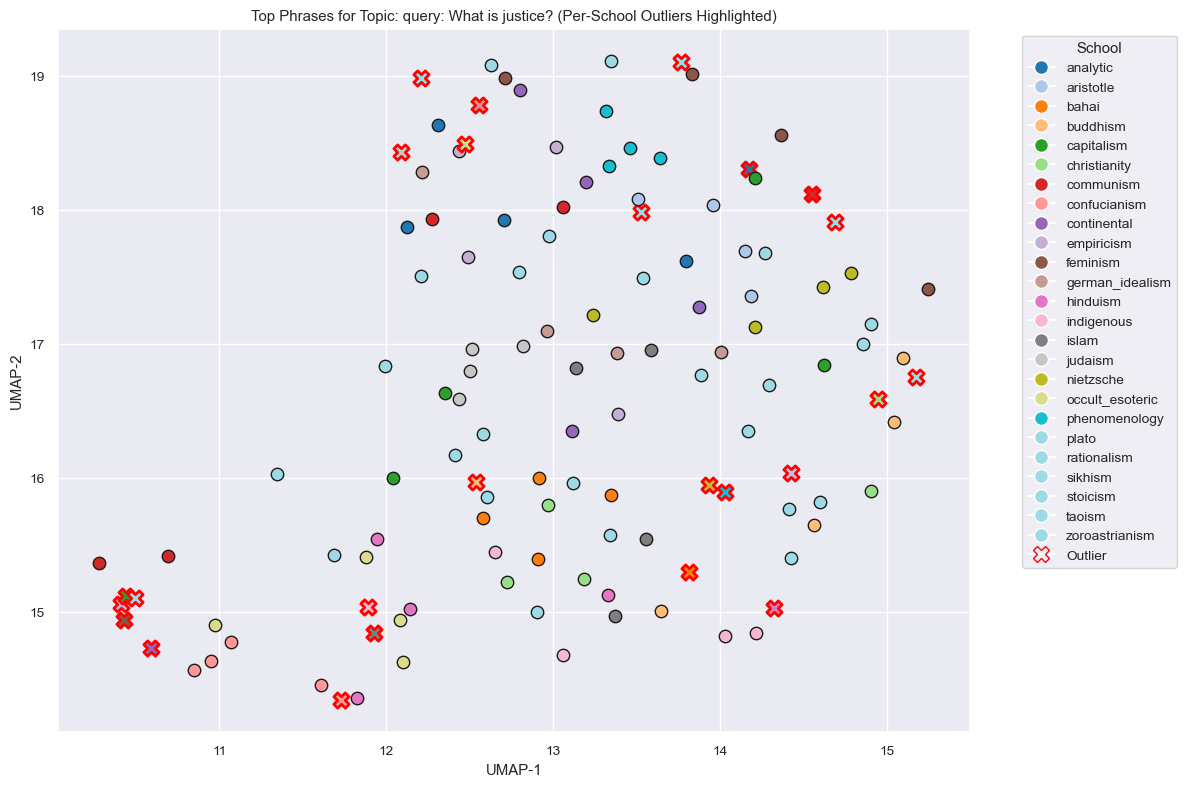

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# After proj = reducer.fit_transform(points)
outlier_indices = []
schools = np.array(schools).astype(str) # Ensure 1D array of strings
for school in np.unique(schools):
    idxs = np.where(schools == school)[0]
    if len(idxs) < 2:
        continue  # Not enough points to compute std
    school_points = proj[idxs]
    centroid = np.mean(school_points, axis=0)
    dists = np.linalg.norm(school_points - centroid, axis=1)
    threshold = np.mean(dists) + np.std(dists)
    outliers = idxs[dists > threshold]
    outlier_indices.extend(outliers)

print("Outlier indices:", outlier_indices)
for idx in outlier_indices:
    print(f"Outlier: {labels[idx]} (school: {schools[idx]}, domain: {domains[idx]})")

# Plot with outliers highlighted
plt.figure(figsize=(12, 8))
for i, (x, y) in enumerate(proj):
    color = school_to_color[schools[i]]
    if i in outlier_indices:
        plt.scatter(x, y, color=color, edgecolor='red', s=120, linewidth=2, marker='X', label='Outlier' if i == outlier_indices[0] else "")
    else:
        plt.scatter(x, y, color=color, edgecolor='k', s=80)
handles = [plt.Line2D([0], [0], marker='o', color='w', label=school, markerfacecolor=school_to_color[school], markersize=10) for school in np.unique(schools)]
plt.legend(handles=handles + [plt.Line2D([0], [0], marker='X', color='w', label='Outlier', markerfacecolor='none', markeredgecolor='red', markersize=12)], bbox_to_anchor=(1.05, 1), loc='upper left', title="School")
plt.title(f"Top Phrases for Topic: {topic} (Per-School Outliers Highlighted)")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.tight_layout()
plt.show()

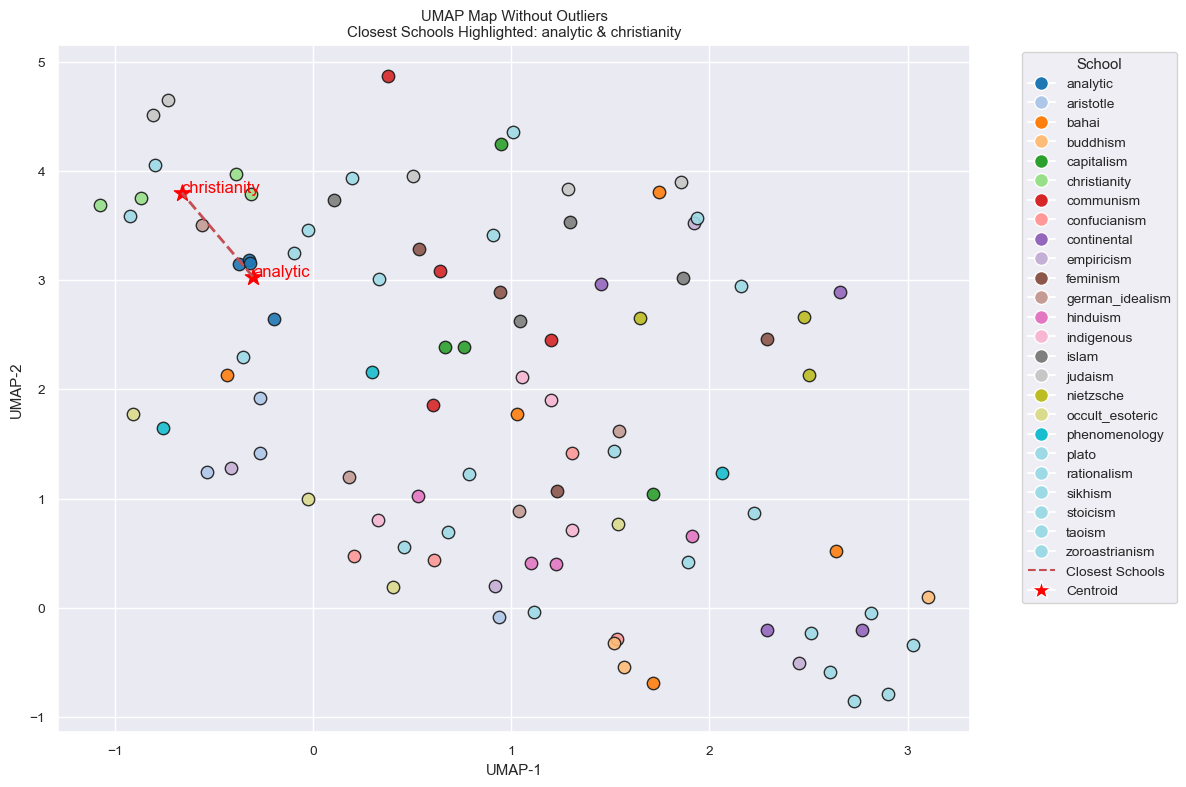

In [38]:
from itertools import combinations
# Remove outliers
mask = np.ones(len(points), dtype=bool)
mask[outlier_indices] = False
labels = np.array(labels)
schools = np.array(schools)
domains = np.array(domains)
points_no_out = points[mask]
labels_no_out = labels[mask]
schools_no_out = schools[mask]
domains_no_out = domains[mask]
proj_no_out = proj[mask]



# Compute centroids and highlight closest pair
school_centroids = {}
school_intra_dists = {}
for school in np.unique(schools_no_out):
    idxs = np.where(schools_no_out == school)[0]
    school_points = proj_no_out[idxs]
    school_centroids[school] = school_points.mean(axis=0)
    # Compute average intra-school distance to centroid
    dists = np.linalg.norm(school_points - school_centroids[school], axis=1)
    school_intra_dists[school] = np.mean(dists)

# Compute global average intra-school distance
global_intra_mean = np.percentile(np.array(list(school_intra_dists.values()), dtype=float), 10)


min_dist = float('inf')
closest_pair = (None, None)
for s1, s2 in combinations(school_centroids.keys(), 2):
    if school_intra_dists[s1] < global_intra_mean and school_intra_dists[s2] < global_intra_mean:
        dist = np.linalg.norm(school_centroids[s1] - school_centroids[s2])
        if dist < min_dist:
            min_dist = dist
            closest_pair = (s1, s2)


# Plot as before, but only if a valid pair is found
plt.figure(figsize=(12, 8))
for i, (x, y) in enumerate(proj_no_out):
    color = school_to_color[schools_no_out[i]]
    plt.scatter(x, y, color=color, edgecolor='k', s=80, alpha=0.9)

if closest_pair[0] is not None:
    c1, c2 = school_centroids[closest_pair[0]], school_centroids[closest_pair[1]]
    plt.plot([c1[0], c2[0]], [c1[1], c2[1]], 'r--', linewidth=2, label=f'Closest: {closest_pair[0]} & {closest_pair[1]}')
    plt.scatter([c1[0], c2[0]], [c1[1], c2[1]], color='red', s=150, marker='*', label='Centroids')
    plt.text(c1[0], c1[1], closest_pair[0], fontsize=12, color='red')
    plt.text(c2[0], c2[1], closest_pair[1], fontsize=12, color='red')

handles = [plt.Line2D([0], [0], marker='o', color='w', label=school,
                      markerfacecolor=school_to_color[school], markersize=10)
           for school in np.unique(schools_no_out)]
plt.legend(handles=handles + [
    plt.Line2D([0], [0], color='r', linestyle='--', label='Closest Schools'),
    plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='red', label='Centroid', markersize=15)
], bbox_to_anchor=(1.05, 1), loc='upper left', title="School")
plt.title(f"UMAP Map Without Outliers\nClosest Schools Highlighted: {closest_pair[0]} & {closest_pair[1]}")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.tight_layout()
plt.show()


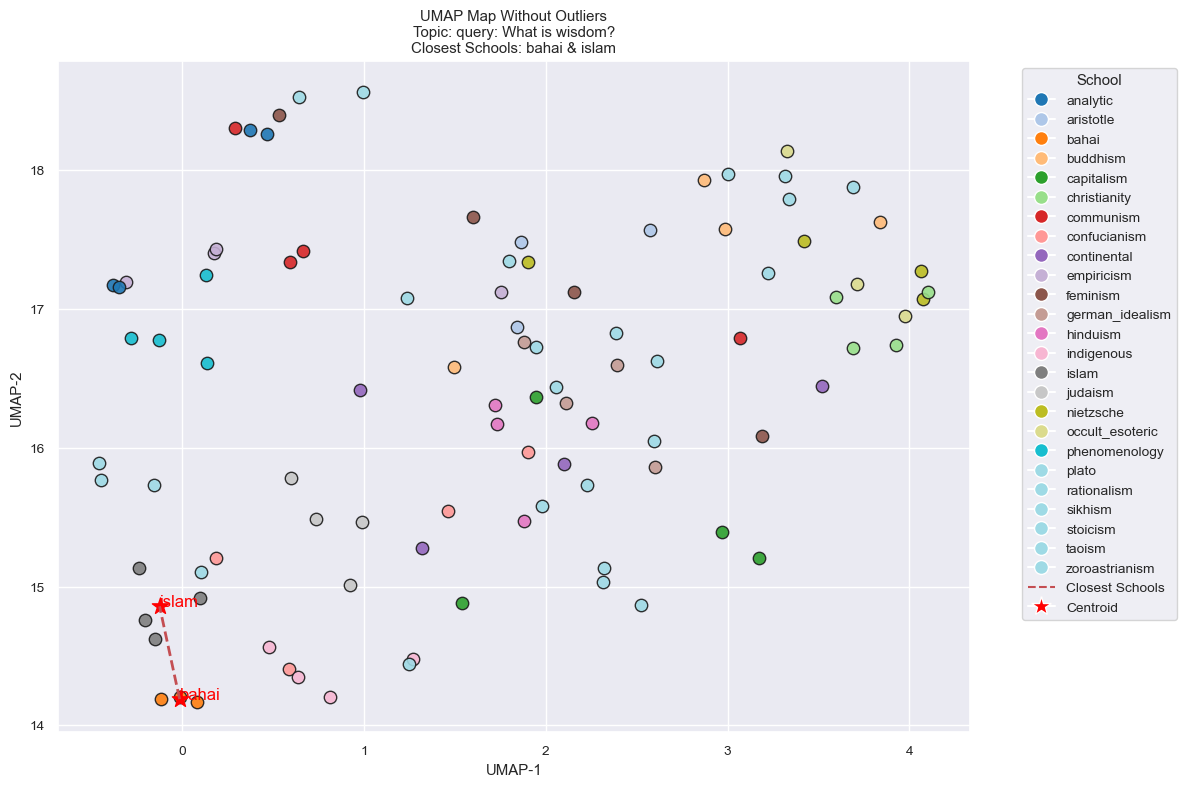


Sample phrases from bahai:
  - It bestoweth wealth without gold, and conferreth immortality without death.
  - And how can this be beneficial (to the other)?.
  - When one knows that he is his mother's child, and proceeds to guard (the qualities of) the mother that belong to him, to the end of his life he will be free from all peril.

Sample phrases from islam:
  - If ye find no one in the house, enter not until permission is given to you: if ye are asked to go back, go back: that makes for greater purity for yourselves: and Allah knows well all that ye do.
  - "It is He Who knows what is open in speech and what ye hide (in your hearts).
  - Now no person knows what delights of the eye are kept hidden (in reserve) for them - as a reward for their (good) deeds.


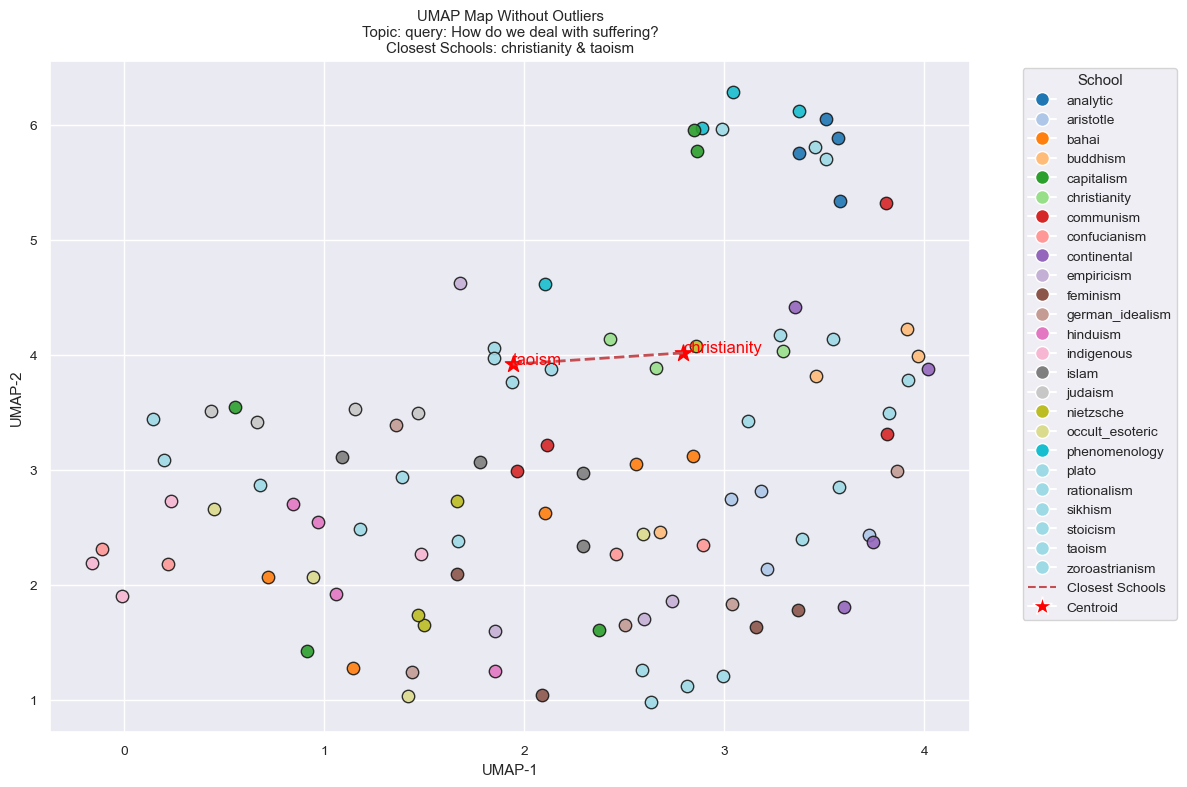


Sample phrases from christianity:
  - If ye find no one in the house, enter not until permission is given to you: if ye are asked to go back, go back: that makes for greater purity for yourselves: and Allah knows well all that ye do.
  - "It is He Who knows what is open in speech and what ye hide (in your hearts).
  - Now no person knows what delights of the eye are kept hidden (in reserve) for them - as a reward for their (good) deeds.

Sample phrases from taoism:
  - In every leaf ineffable delights are treasured, and within every chamber unnumbered mysteries lie hidden.
  - It bestoweth wealth without gold, and conferreth immortality without death.
  - And how can this be beneficial (to the other)?.


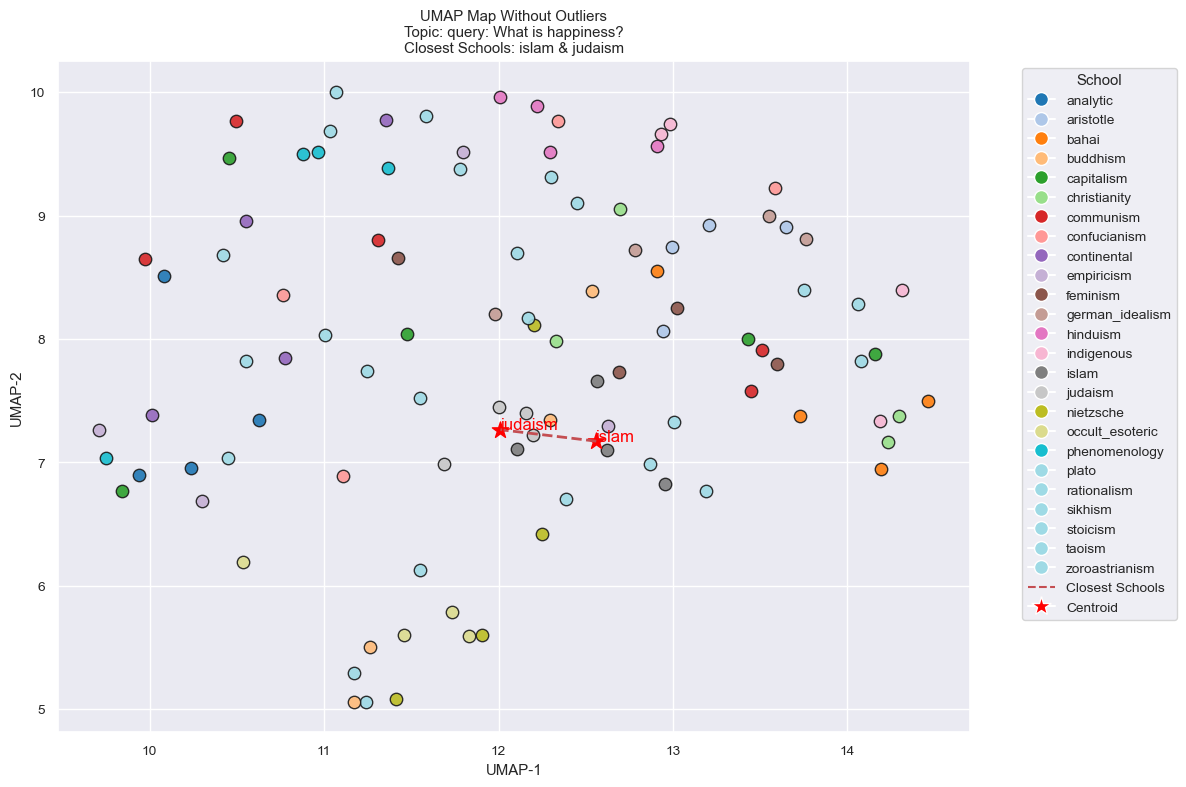


Sample phrases from islam:
  - Health is the greatest of gifts, contentedness the best riches; trust is the best of relationships, Nirvana the highest happiness.
  - Rouse thyself by thyself, examine thyself by thyself, thus self protected and attentive wilt thou live happily, Bhikshu!
  - The taint of prayers is non repetition; the taint of houses, non repair; the taint of the body is sloth; the taint of a watchman, thoughtlessness.

Sample phrases from judaism:
  - But above all things it was necessary that such regulations should be kept secret.
  - What oppression is more grievous than that a soul seeking the truth, and wishing to attain unto the knowledge of God, should know not where to go for it and from whom to seek it?
  - For in Our solitude We were unaware of the harm or benefit, the health or ailment, of any soul.


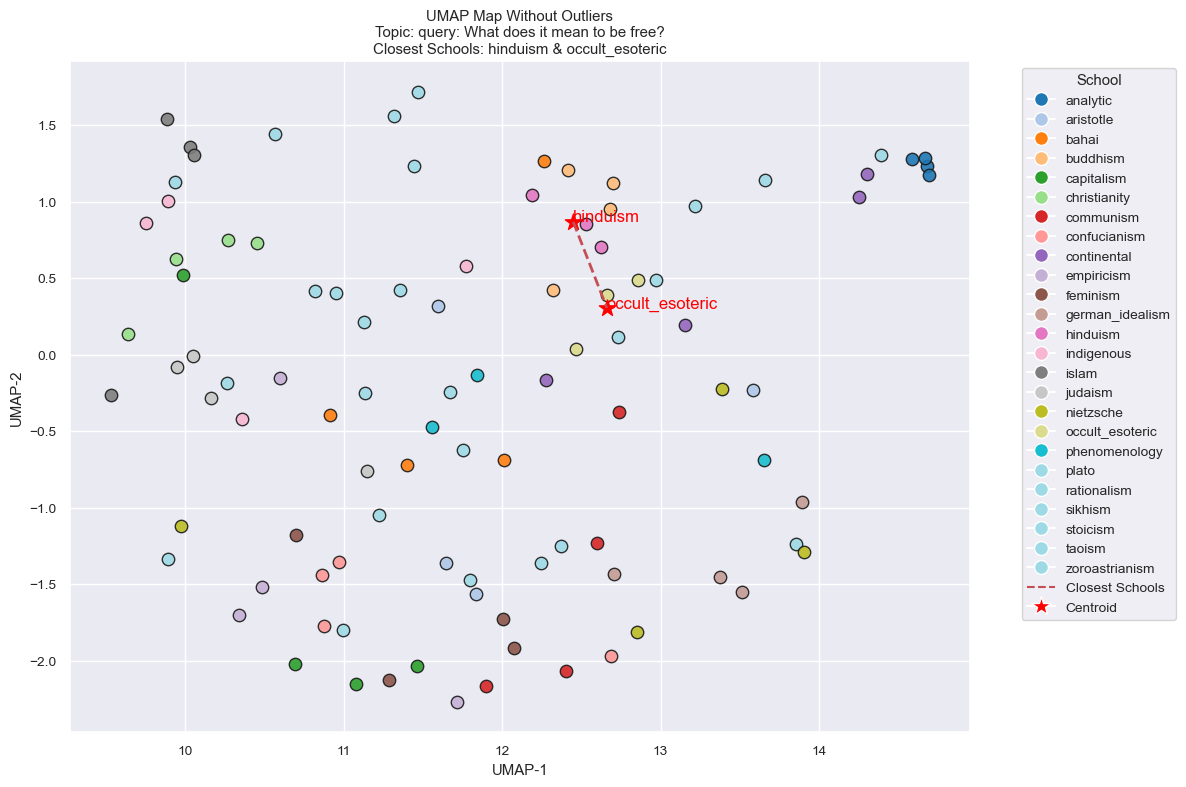


Sample phrases from hinduism:
  - It is like specifying a residence with a particular address to locate the individual who resides there.
  - If you mean Life and Mind as we poor petty mortals know them, we say No! is not that!
  - It is this: Adapt each one of your actions, and frame each one of your words in such a way that you infringe upon no one's free will.

Sample phrases from occult_esoteric:
  - a virtue which consists in the knowledge of things good, bad, and indifferent.
  - its abiding as the Self of non intelligent and intelligent beings in their gross condition, distinguished by name and form.
  - the attainment of the Self free from all imagination.


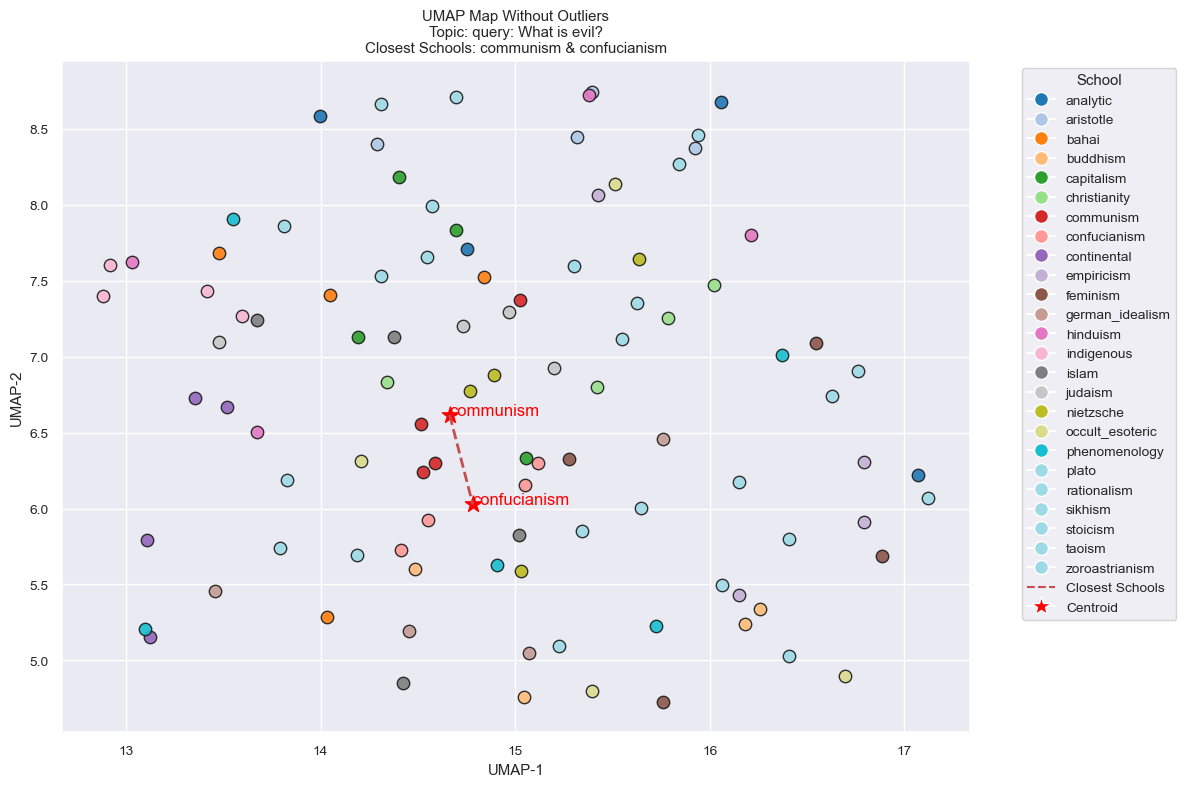


Sample phrases from communism:
  - whatever in the open air or undercover, in which any handicraft is carried on by any child, young person, or woman, and to which and over which the person by whom such child, young person, or woman is employed, has the right of access and control.
  - The only thing that interests us is the secret discovered in the new world by the Political Economy of the old world, and proclaimed on the housetops: that the capitalist mode of production and accumulation, and therefore capitalist private property, have for their fundamental condition the annihilation of self earned private property; in other words, the expropriation of the laborer.
  - To satisfy pure miserliness, ie unreasonable but insistent inhibitions against acts of expenditure as such.

Sample phrases from confucianism:
  - Guarding with the breath (prana, life) the lower nest, the immortal moves away from the nest; that immortal one goes wherever he likes, the golden person, the lonely bird.
 

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import warnings
warnings.filterwarnings("ignore")
# Helper function to extract points for a topic
def extract_points_for_topic(topic):
    points, labels, full_labels, schools, domains = [], [], [], [], []
    for domain in ['philosophy', 'religion']:
        if domain == 'philosophy':
            meta = phil_meta
            embeddings = phil_embeddings
            meta_key = 'sentence_str'
        else:
            meta = reli_meta
            embeddings = reli_embeddings
            meta_key = 'text'
        for school, phrases in thematic_results[topic][domain].items():
            for p in phrases:
                match = [i for i, m in enumerate(meta) if m[meta_key] == p['text']]
                if match:
                    idx = match[0]
                    points.append(embeddings[idx])
                    # Truncated label
                    labels.append(p['text'][:40] + "..." if len(p['text']) > 40 else p['text'])
                    # Full label
                    full_labels.append(p['text'])
                    schools.append(school)
                    domains.append(domain)
    return (np.array(points), np.array(labels), np.array(full_labels),
            np.array(schools), np.array(domains))

# Store interesting results
interesting_results = []

for topic in list(thematic_results.keys()):
    points, labels, full_labels, schools, domains = extract_points_for_topic(topic)
    if len(points) == 0:
        continue

    # UMAP projection
    reducer = umap.UMAP(n_components=2, random_state=42)
    proj = reducer.fit_transform(points)

    # Outlier removal (per-school, 2 std from mean)
    outlier_indices = []
    for school in np.unique(schools):
        idxs = np.where(schools == school)[0]
        if len(idxs) < 2:
            continue
        school_points = proj[idxs]
        centroid = np.mean(school_points, axis=0)
        dists = np.linalg.norm(school_points - centroid, axis=1)
        threshold = np.mean(dists) + np.std(dists)
        outliers = idxs[dists > threshold]
        outlier_indices.extend(outliers)
    mask = np.ones(len(points), dtype=bool)
    mask[outlier_indices] = False
    points_no_out = points[mask]
    labels_no_out = labels[mask]
    full_labels_no_out = full_labels[mask]
    schools_no_out = schools[mask]
    domains_no_out = domains[mask]
    proj_no_out = proj[mask]

    # Compute centroids and intra-school distances
    school_centroids = {}
    school_intra_dists = {}
    for school in np.unique(schools_no_out):
        idxs = np.where(schools_no_out == school)[0]
        school_points = proj_no_out[idxs]
        school_centroids[school] = school_points.mean(axis=0)
        dists = np.linalg.norm(school_points - school_centroids[school], axis=1)
        school_intra_dists[school] = np.mean(dists)
    if len(school_intra_dists) < 2:
        continue
    global_intra_mean = np.percentile(np.array(list(school_intra_dists.values()), dtype=float), 10)

    # Find closest pair of tightly clustered schools
    min_dist = float('inf')
    closest_pair = (None, None)
    for s1, s2 in combinations(school_centroids.keys(), 2):
        if school_intra_dists[s1] < global_intra_mean and school_intra_dists[s2] < global_intra_mean:
            dist = np.linalg.norm(school_centroids[s1] - school_centroids[s2])
            if dist < min_dist:
                min_dist = dist
                closest_pair = (s1, s2)

    # Save interesting result if the closest pair is very close (tune threshold as needed)
    if closest_pair[0] is not None and min_dist < 1.0:  # You can adjust this threshold
        interesting_results.append({
            'topic': topic,
            'closest_pair': closest_pair,
            'min_dist': min_dist,
            'proj_no_out': proj_no_out,
            'schools_no_out': schools_no_out,
            'school_to_color': {school: plt.cm.tab20(i) for i, school in enumerate(np.unique(schools_no_out))},
            'school_centroids': school_centroids
        })

# Plot a couple of the most interesting graphs
for result in interesting_results[:5]:  # Show top 5
    topic = result['topic']
    closest_pair = result['closest_pair']
    proj_no_out = result['proj_no_out']
    schools_no_out = result['schools_no_out']
    school_to_color = result['school_to_color']
    school_centroids = result['school_centroids']
    c1, c2 = school_centroids[closest_pair[0]], school_centroids[closest_pair[1]]

    plt.figure(figsize=(12, 8))
    for i, (x, y) in enumerate(proj_no_out):
        color = school_to_color[schools_no_out[i]]
        plt.scatter(x, y, color=color, edgecolor='k', s=80, alpha=0.9)
    plt.plot([c1[0], c2[0]], [c1[1], c2[1]], 'r--', linewidth=2, label=f'Closest: {closest_pair[0]} & {closest_pair[1]}')
    plt.scatter([c1[0], c2[0]], [c1[1], c2[1]], color='red', s=150, marker='*', label='Centroids')
    plt.text(c1[0], c1[1], closest_pair[0], fontsize=12, color='red')
    plt.text(c2[0], c2[1], closest_pair[1], fontsize=12, color='red')
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=school,
                          markerfacecolor=school_to_color[school], markersize=10)
               for school in np.unique(schools_no_out)]
    plt.legend(handles=handles + [
        plt.Line2D([0], [0], color='r', linestyle='--', label='Closest Schools'),
        plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='red', label='Centroid', markersize=15)
    ], bbox_to_anchor=(1.05, 1), loc='upper left', title="School")
    plt.title(f"UMAP Map Without Outliers\nTopic: {topic}\nClosest Schools: {closest_pair[0]} & {closest_pair[1]}")
    plt.xlabel("UMAP-1")
    plt.ylabel("UMAP-2")
    plt.tight_layout()
    plt.show()
    
    # Show a couple of phrases from each school in the closest pair
    for school in closest_pair:
        print(f"\nSample phrases from {school}:")
        # Get indices for this school
        idxs = np.where(schools_no_out == school)[0]
        # Show up to 3 phrases
        for idx in idxs[:3]:
            print(f"  - {full_labels_no_out[idx]}")